In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [4]:
data = pd.read_csv("iris.csv")
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [10]:
data.replace("?", np.nan, inplace=True)
data.dropna(inplace=True)
data.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [16]:
for column in ["sepal.length", "sepal.width", "petal.length", "petal.width"]:
    data = data[data[column] >= 0]

negative_values = (data[["sepal.length", "sepal.width", "petal.length", "petal.width"]] < 0).any()
negative_values

sepal.length    False
sepal.width     False
petal.length    False
petal.width     False
dtype: bool

In [28]:
from scipy.stats import zscore
z_scores = data[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']].apply(zscore)
data = data[(z_scores.abs() <= 3).all(axis=1)]

z_scores_after = data[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']].apply(zscore)
outliers_after_removal = (z_scores_after.abs() > 3).any(axis=1).sum()
print(f"Number of outliers remaining: {outliers_after_removal}")
print("After outlier removal:", data.shape)

Number of outliers remaining: 0
After outlier removal: (149, 5)


In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[["sepal.length", "sepal.width", "petal.length", "petal.width"]] = scaler.fit_transform(data[["sepal.length", "sepal.width", "petal.length", "petal.width"]])

data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,-0.898927,1.071184,-1.351829,-1.323014,Setosa
1,-1.140478,-0.114599,-1.351829,-1.323014,Setosa
2,-1.382029,0.359714,-1.408792,-1.323014,Setosa
3,-1.502804,0.122557,-1.294865,-1.323014,Setosa
4,-1.019702,1.308340,-1.351829,-1.323014,Setosa


In [55]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['variety'] = encoder.fit_transform(data['variety'])

data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,-0.898927,1.071184,-1.351829,-1.323014,0
1,-1.140478,-0.114599,-1.351829,-1.323014,0
2,-1.382029,0.359714,-1.408792,-1.323014,0
3,-1.502804,0.122557,-1.294865,-1.323014,0
4,-1.019702,1.308340,-1.351829,-1.323014,0


In [63]:
X = data[["sepal.length", "sepal.width", "petal.length", "petal.width"]]
# X = data.drop("variety", axis=1)
y = data["variety"]

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)

In [69]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)

In [71]:
print("Logistic Regression Accuracy:", log_reg_acc)
print("Naive Bayes Accuracy:", nb_acc)

Logistic Regression Accuracy: 0.9111111111111111
Naive Bayes Accuracy: 0.8666666666666667


In [85]:
print(classification_report(y_test, log_reg_pred, target_names=["Setosa","Versicolour","Virginica"]))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        19
 Versicolour       0.91      0.77      0.83        13
   Virginica       0.80      0.92      0.86        13

    accuracy                           0.91        45
   macro avg       0.90      0.90      0.90        45
weighted avg       0.92      0.91      0.91        45



In [87]:
conf_lr = confusion_matrix(y_test, log_reg_pred)
print(f'confusion matrix: \n {conf_lr}')

confusion matrix: 
 [[19  0  0]
 [ 0 10  3]
 [ 0  1 12]]


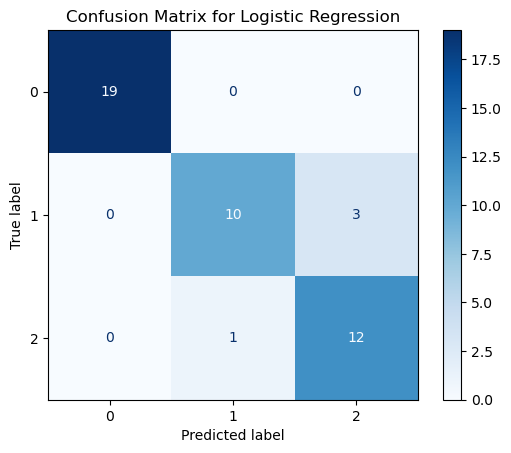

In [81]:
# Import necessary libraries for confusion matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Confusion Matrix for Logistic Regression
log_reg_cm = confusion_matrix(y_test, log_reg_pred)

# Plot confusion matrix for Logistic Regression
log_reg_disp = ConfusionMatrixDisplay(confusion_matrix=log_reg_cm, display_labels=encoder.classes_)
log_reg_disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

In [89]:
print(classification_report(y_test, nb_pred, target_names=["Setosa","Versicolour","Virginica"]))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        19
 Versicolour       0.89      0.62      0.73        13
   Virginica       0.71      0.92      0.80        13

    accuracy                           0.87        45
   macro avg       0.86      0.85      0.84        45
weighted avg       0.88      0.87      0.86        45



In [91]:
conf_lr = confusion_matrix(y_test, nb_pred)
print(f'confusion matrix: \n {conf_lr}')

confusion matrix: 
 [[19  0  0]
 [ 0  8  5]
 [ 0  1 12]]


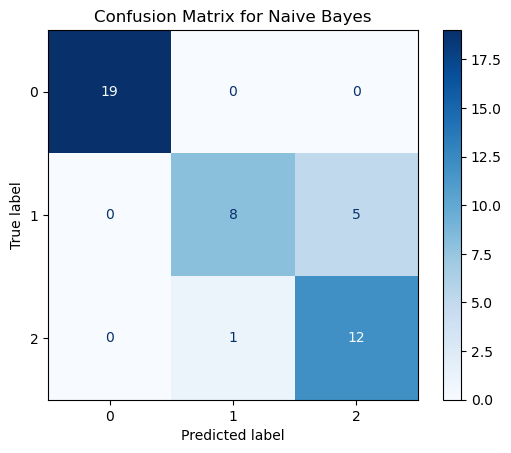

In [83]:
# Confusion Matrix for Naive Bayes
nb_cm = confusion_matrix(y_test, nb_pred)

# Plot confusion matrix for Naive Bayes
nb_disp = ConfusionMatrixDisplay(confusion_matrix=nb_cm, display_labels=encoder.classes_)
nb_disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Naive Bayes")
plt.show()